In [39]:
# 1. dataset <- transaction.csv, dan tampilkan
import pandas as pd

dataset = pd.read_csv('transaction.csv')
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


In [40]:
# 2. country <- berapa kemunculan tiap negeri pada dataset, dan tampilkan
country= pd.DataFrame(dataset, columns=['Country']).value_counts()

print(country)

Country             
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Lithuania                  8
Brazil                     8
Lebanon                    5
European Community         5
Czech Republic        

In [41]:
# 3. transaksi <- hitunglah banyaknya rata-rata jumlah barang (Qty) per transaksi pada tiap negara (1 kode InvoiceNo = 1 transaksi)
from sklearn.cluster import KMeans

# Menghitung total Qty per transaksi
total_qty_per_transaction = dataset.groupby(['InvoiceNo', 'Country'])['Qty'].sum().reset_index()

# Menghitung rata-rata Qty per negara
transaksi = total_qty_per_transaction.groupby('Country')['Qty'].mean().reset_index()

# Melihat hasil
print("Rata-rata Qty per negara:")
print(transaksi)

Rata-rata Qty per negara:
                 Country          Qty
0              Australia  4026.295455
1                Austria  3420.250000
2                Bahrain  1470.000000
3                Belgium  3032.714286
4                 Brazil  4389.000000
5                 Canada  6449.666667
6        Channel Islands  4569.714286
7                 Cyprus  3550.875000
8         Czech Republic  1239.500000
9                Denmark  3018.888889
10                  EIRE  3788.866071
11    European Community   921.666667
12               Finland  3118.000000
13                France  3197.549419
14               Germany  3119.766578
15                Greece  3473.000000
16               Iceland  3267.666667
17                Israel  7046.500000
18                 Italy  3186.096774
19                 Japan  3089.857143
20               Lebanon  2836.000000
21             Lithuania  2013.000000
22                 Malta  3758.500000
23           Netherlands  4402.934211
24                Norway

In [42]:
# 4. cluster_i[1-10], cluster_val[1-10] <- lakukan clustering pada transaksi dengan K-Means, dengan k=3, sebanyak 10 kali. Setiap kali selesai clustering, lakukan cluster analysis dengan SSE
import numpy as np
# Inisialisasi untuk menyimpan hasil
cluster_i = []
cluster_val = []
sse_values = []

# K-Means clustering sebanyak 10 kali
for i in range(10):
    kmeans = KMeans(n_clusters=3, random_state=i)
    kmeans.fit(transaksi[['Qty']])

    # Menyimpan hasil cluster dan SSE
    cluster_i.append(kmeans.labels_)
    cluster_val.append(transaksi[['Country', 'Qty']].assign(Cluster=kmeans.labels_))
    sse_values.append(kmeans.inertia_)

# Menampilkan hasil analisis
for i in range(10):
    print(f"\nClustering Iterasi {i+1}:")
    print(cluster_val[i])
    print(f"SSE: {sse_values[i]}")

# Rata-rata SSE dari 10 iterasi
average_sse = np.mean(sse_values)
print(f"\nRata-rata SSE dari 10 iterasi: {average_sse}")


Clustering Iterasi 1:
                 Country          Qty  Cluster
0              Australia  4026.295455        0
1                Austria  3420.250000        0
2                Bahrain  1470.000000        2
3                Belgium  3032.714286        0
4                 Brazil  4389.000000        0
5                 Canada  6449.666667        1
6        Channel Islands  4569.714286        0
7                 Cyprus  3550.875000        0
8         Czech Republic  1239.500000        2
9                Denmark  3018.888889        0
10                  EIRE  3788.866071        0
11    European Community   921.666667        2
12               Finland  3118.000000        0
13                France  3197.549419        0
14               Germany  3119.766578        0
15                Greece  3473.000000        0
16               Iceland  3267.666667        0
17                Israel  7046.500000        1
18                 Italy  3186.096774        0
19                 Japan  3089.857143

In [43]:
# 5. cluster <- ambil cluster_i yang mempunyai cluster_val terkecil

# Menemukan indeks dari SSE terkecil
min_sse_index = np.argmin(sse_values)

# Mengambil cluster_i yang sesuai dengan indeks SSE terkecil
best_cluster_i = cluster_i[min_sse_index]
best_cluster_val = cluster_val[min_sse_index]

# Menampilkan hasil
print(f"Cluster dengan SSE terkecil (iterasi {min_sse_index + 1}):")
print(best_cluster_val)
print(f"SSE terkecil: {sse_values[min_sse_index]}")

Cluster dengan SSE terkecil (iterasi 1):
                 Country          Qty  Cluster
0              Australia  4026.295455        0
1                Austria  3420.250000        0
2                Bahrain  1470.000000        2
3                Belgium  3032.714286        0
4                 Brazil  4389.000000        0
5                 Canada  6449.666667        1
6        Channel Islands  4569.714286        0
7                 Cyprus  3550.875000        0
8         Czech Republic  1239.500000        2
9                Denmark  3018.888889        0
10                  EIRE  3788.866071        0
11    European Community   921.666667        2
12               Finland  3118.000000        0
13                France  3197.549419        0
14               Germany  3119.766578        0
15                Greece  3473.000000        0
16               Iceland  3267.666667        0
17                Israel  7046.500000        1
18                 Italy  3186.096774        0
19                 

In [44]:
# 6. centroid <- tentukan posisi centroid dari setiap cluster

# Menggunakan K-Means dengan SSE terkecil untuk mendapatkan centroid
best_kmeans = KMeans(n_clusters=3, random_state=min_sse_index)
best_kmeans.fit(transaksi[['Qty']])

# Mendapatkan posisi centroid
centroids = best_kmeans.cluster_centers_

# Menampilkan posisi centroid
for idx, centroid in enumerate(centroids):
    print(f"Centroid untuk Cluster {idx + 1}: {centroid[0]}")

Centroid untuk Cluster 1: 3542.2195214569438
Centroid untuk Cluster 2: 6173.85081300813
Centroid untuk Cluster 3: 1400.1303418803418


In [45]:
# 7. sorted <- lakukan pengurutan posisi centroid secara ascending
# Menggunakan K-Means dengan SSE terkecil untuk mendapatkan centroid
best_kmeans = KMeans(n_clusters=3, random_state=min_sse_index)
best_kmeans.fit(transaksi[['Qty']])

# Mendapatkan posisi centroid
centroids = best_kmeans.cluster_centers_

# Membuat DataFrame untuk menyimpan centroid
centroid_df = pd.DataFrame(centroids, columns=['Centroid_Qty'])
centroid_df['Cluster'] = range(1, len(centroids) + 1)

# Mengurutkan centroid secara ascending
sorted_centroids = centroid_df.sort_values(by='Centroid_Qty')

# Menampilkan centroid yang terurut
print("Centroid yang diurutkan secara ascending:")
print(sorted_centroids)

Centroid yang diurutkan secara ascending:
   Centroid_Qty  Cluster
2   1400.130342        3
0   3542.219521        1
1   6173.850813        2


In [46]:
#8. Tampilkan negara mana saja yang transaksinya rendah, sedang dan tinggi.

# Menggunakan K-Means dengan SSE terkecil untuk mendapatkan centroid
best_kmeans = KMeans(n_clusters=3, random_state=min_sse_index)
best_kmeans.fit(transaksi[['Qty']])

# Mendapatkan posisi centroid
centroids = best_kmeans.cluster_centers_

# Membuat DataFrame untuk menyimpan centroid
centroid_df = pd.DataFrame(centroids, columns=['Centroid_Qty'])
centroid_df['Cluster'] = range(1, len(centroids) + 1)

# Mengurutkan centroid secara ascending
sorted_centroids = centroid_df.sort_values(by='Centroid_Qty')

# Mendapatkan indeks cluster
low_cluster_index = sorted_centroids.index[0]  # Cluster rendah
high_cluster_index = sorted_centroids.index[-1]  # Cluster tinggi
medium_cluster_index = sorted_centroids.index[1]  # Cluster sedang

# Menambahkan label cluster ke DataFrame rata-rata Qty per negara
transaksi['Cluster'] = best_kmeans.labels_

# Menampilkan negara dengan transaksi rendah, sedang, dan tinggi
low_transactions = transaksi[transaksi['Cluster'] == low_cluster_index]
medium_transactions = transaksi[transaksi['Cluster'] == medium_cluster_index]
high_transactions = transaksi[transaksi['Cluster'] == high_cluster_index]

print("Negara dengan transaksi rendah:")
print(low_transactions[['Country', 'Qty']])

print("\nNegara dengan transaksi sedang:")
print(medium_transactions[['Country', 'Qty']])

print("\nNegara dengan transaksi tinggi:")
print(high_transactions[['Country', 'Qty']])


Negara dengan transaksi rendah:
               Country          Qty
2              Bahrain  1470.000000
8       Czech Republic  1239.500000
11  European Community   921.666667
21           Lithuania  2013.000000
28        Saudi Arabia   592.000000
31              Sweden  2164.615385

Negara dengan transaksi sedang:
            Country          Qty
0         Australia  4026.295455
1           Austria  3420.250000
3           Belgium  3032.714286
4            Brazil  4389.000000
6   Channel Islands  4569.714286
7            Cyprus  3550.875000
9           Denmark  3018.888889
10             EIRE  3788.866071
12          Finland  3118.000000
13           France  3197.549419
14          Germany  3119.766578
15           Greece  3473.000000
16          Iceland  3267.666667
18            Italy  3186.096774
19            Japan  3089.857143
20          Lebanon  2836.000000
22            Malta  3758.500000
23      Netherlands  4402.934211
24           Norway  4679.107143
25           Poland  25

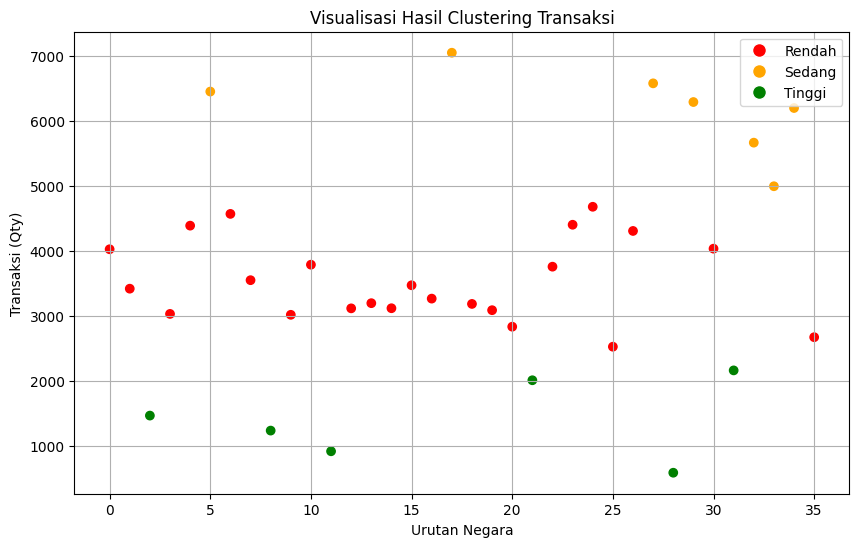

In [47]:
# 9. Visualisasi dengan warna yang berbeda untuk hasil cluster (no. 8)
import matplotlib.pyplot as plt

# Menggunakan K-Means dengan SSE terkecil untuk mendapatkan centroid
best_kmeans = KMeans(n_clusters=3, random_state=min_sse_index)
best_kmeans.fit(transaksi[['Qty']])

# Menambahkan label cluster ke DataFrame rata-rata Qty per negara
transaksi['Cluster'] = best_kmeans.labels_

# Menentukan warna untuk setiap cluster
colors = {0: 'red', 1: 'orange', 2: 'green'}  # Misalkan 0 = rendah, 1 = sedang, 2 = tinggi
transaksi['Color'] = transaksi['Cluster'].map(colors)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(transaksi.index, transaksi['Qty'],
            c=transaksi['Color'], label='Cluster')

# Menambahkan label untuk sumbu
plt.xlabel('Urutan Negara')
plt.ylabel('Transaksi (Qty)')
plt.title('Visualisasi Hasil Clustering Transaksi')

# Menambahkan legenda
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Rendah')
orange_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Sedang')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Tinggi')
plt.legend(handles=[red_patch, orange_patch, green_patch])

plt.grid()
plt.show()